# Data Preprocessing

## Dimensionality Reduction

We will apply different dimensionality reduction methods to the iris dataset

We will start with PCA, that finds a new space where the new dimensions are orthogonal preserving the variance of the data

In [23]:
from sklearn import datasets
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

In [24]:
iris = datasets.load_iris()
col = ['r', 'g', 'b']
lc = [col[i] for i in iris['target']]

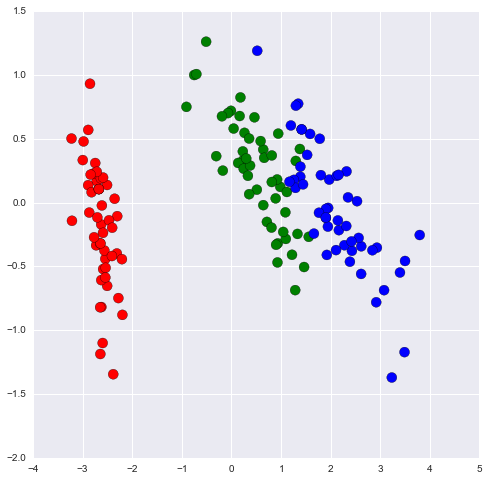

In [25]:
from sklearn.decomposition import PCA
pca = PCA()
fdata = pca.fit_transform(iris['data'])
fig = plt.figure(figsize=(8,8))
plt.scatter(fdata[:, 0], fdata[:, 1], c=lc,s=100)

Looking at the variance explained by each component, we can see that the first one has most of the variance and the two first components explains almost 98%, so only this components would be necessary. 

In [26]:
print pca.explained_variance_ratio_

[ 0.92461621  0.05301557  0.01718514  0.00518309]


The relationships among the data can be explained using linear transformations, but we can observe if non linear transformations can improve se separability of the patters. First we will try KernelPCA using a RBF kernel.

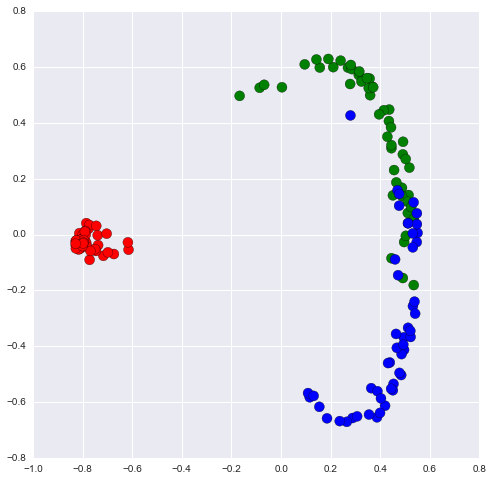

In [27]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel='rbf')
fdata = kpca.fit_transform(iris['data'])
fig = plt.figure(figsize=(8,8))
plt.scatter(fdata[:, 0], fdata[:, 1], c=lc,s=100)

As you can see the clusters get mopre elongated, but separability does not change.

We can test other transformations like ISOMAP

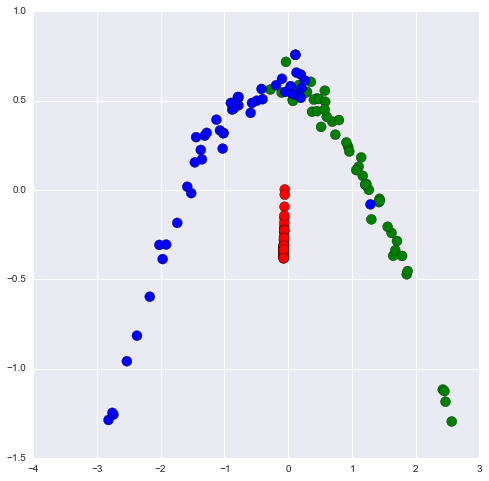

In [28]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2, n_neighbors=10)
fdata = iso.fit_transform(iris['data'])
fig = plt.figure(figsize=(8,8))
plt.scatter(fdata[:, 0], fdata[:, 1], c=lc,s=100)

Obtaining a similar results as KernelPCA in terms of separability.

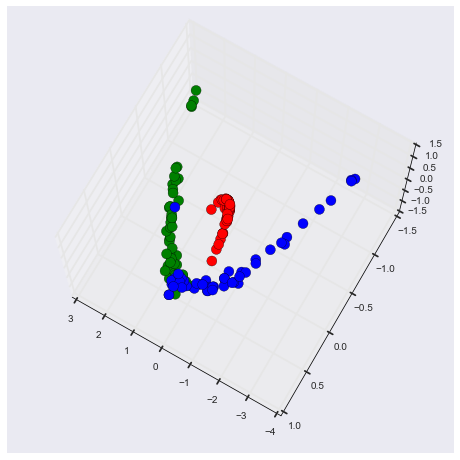

In [37]:
iso = Isomap(n_components=3, n_neighbors=10)
fdata = iso.fit_transform(iris['data'])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(75, 120)
plt.scatter(fdata[:, 0], fdata[:, 1], zs=fdata[:, 2], depthshade=False, c=lc,s=100)

Now we apply Locally Linear Embedding (LLE)

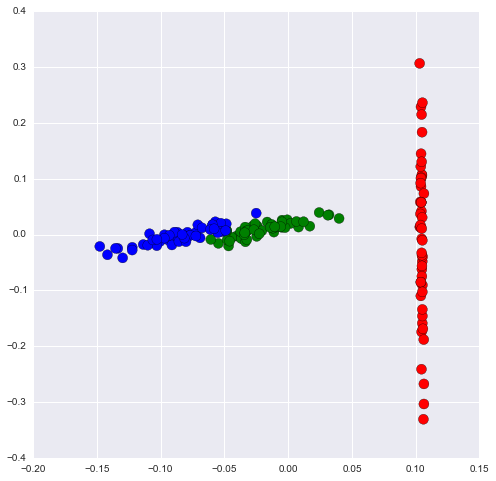

In [39]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_neighbors=25, n_components=2, method='standard')
fdata = lle.fit_transform(iris['data'])
fig = plt.figure(figsize=(8,8))
plt.scatter(fdata[:, 0], fdata[:, 1], c=lc,s=100)

In [40]:
print lle.reconstruction_error_

1.49580320098e-05


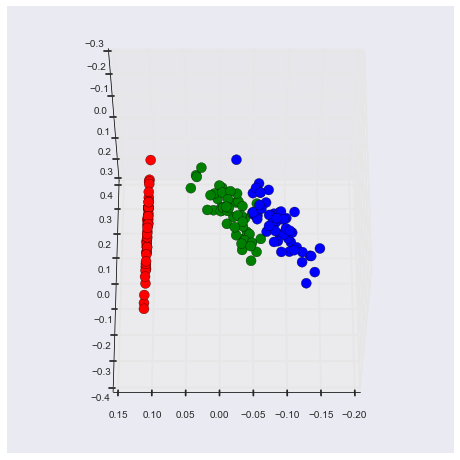

In [77]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_neighbors=25, n_components=3, method='standard')
fdata = lle.fit_transform(iris['data'])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(240, 90)
plt.scatter(fdata[:, 0], fdata[:, 1], zs=fdata[:, 2], depthshade=False, c=lc,s=100)

In [43]:
print lle.reconstruction_error_

3.24748095317e-05


## Feature Selection

Feature selection determines the relevance of the original dimensions to represent the intrinsic structure of the data. We can use the LaplacianScore to rank the attributes from the iris dataset and then decide what dimensions are interesting to keep

In [ ]:
from amltlearn.feature_selection import LaplacianScore
lap = LaplacianScore(n_neighbors=5, bandwidth=0.1, k=2)
irissel = lap.fit_transform(iris['data'])
fig = plt.figure(figsize=(8,8))
plt.scatter(irissel[:, 0], irissel[:, 1], c=lc,s=100)

In [ ]:
print lap.scores_

It looks like the second dimension is the more important accoding to the method followed by the first.